<a href="https://colab.research.google.com/github/laurenliz22/Predicting-Tree-Types/blob/master/Forest_Cover_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Business-Case" data-toc-modified-id="Business-Case-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Business Case</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Data</a></span></li><li><span><a href="#Clean-Data" data-toc-modified-id="Clean-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clean Data</a></span></li><li><span><a href="#Explore-Data" data-toc-modified-id="Explore-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Explore Data</a></span><ul class="toc-item"><li><span><a href="#Target-Exploration" data-toc-modified-id="Target-Exploration-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Target Exploration</a></span></li><li><span><a href="#Feature-Exploration" data-toc-modified-id="Feature-Exploration-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Feature Exploration</a></span><ul class="toc-item"><li><span><a href="#Continuous-Feature-Exploration" data-toc-modified-id="Continuous-Feature-Exploration-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Continuous Feature Exploration</a></span></li><li><span><a href="#Categorical-Feature-Exploration" data-toc-modified-id="Categorical-Feature-Exploration-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Categorical Feature Exploration</a></span></li></ul></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Resample-Data" data-toc-modified-id="Resample-Data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Resample Data</a></span></li><li><span><a href="#Standardize-Continuous-Features" data-toc-modified-id="Standardize-Continuous-Features-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Standardize Continuous Features</a></span></li><li><span><a href="#Train/Validate/Test-Split" data-toc-modified-id="Train/Validate/Test-Split-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Train/Validate/Test Split</a></span></li><li><span><a href="#Create-Functions-For-Modeling" data-toc-modified-id="Create-Functions-For-Modeling-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Create Functions For Modeling</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Baseline-Model:-Random-Forest-(with-default-parameters)" data-toc-modified-id="Baseline-Model:-Random-Forest-(with-default-parameters)-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Baseline Model: Random Forest (with default parameters)</a></span></li><li><span><a href="#Model-#1:-Support-Vector-Machine" data-toc-modified-id="Model-#1:-Support-Vector-Machine-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Model #1: Support Vector Machine</a></span></li><li><span><a href="#Model-#2:-KNN" data-toc-modified-id="Model-#2:-KNN-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Model #2: KNN</a></span></li><li><span><a href="#Model-#3:-XGBoost" data-toc-modified-id="Model-#3:-XGBoost-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Model #3: XGBoost</a></span></li><li><span><a href="#Final-Model:-Random-Forest" data-toc-modified-id="Final-Model:-Random-Forest-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Final Model: Random Forest</a></span></li></ul></li><li><span><a href="#Final-Model-on-Test-Data" data-toc-modified-id="Final-Model-on-Test-Data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Final Model on Test Data</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Business Case

The purpose of this project is to predict the forest cover type based on the predominant kind of tree cover in the Roosevelt National Forest of Colorado to gain an understanding of the ecosystem.  The dataset that is used contains tree observations from four wilderness areas of the Roosevelt National Forest.  This dataset includes information on tree cover type, shadow coverage, wilderness areas, soil type, and local topography.  Based on the data I will develop a model to best predict the forest cover type reflecting the predominant tree coverage in each area as determined by the US Forest Service.

# Import Data

The first step to analyzing this data is to import it.  Google colab was used for this project.

In [88]:
#Import drive from google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import seaborn as sns
import math
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, label_binarize
from xgboost import XGBClassifier

In [90]:
#Import raw dataset
data_raw = pd.read_csv('drive/My Drive/covtype.csv')
print(len(data_raw))
data_raw.head()

581012


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


There are 581,012 data records in the raw dataset

Background on Data: 

The study area includes four wilderness areas located in the Roosevelt National Forest of Colorado. Each tree cover type reflects a 30m x 30m patch.

Target: 
Forest Cover Type (Cover_Type)
* 1 - Spruce/Fir
* 2 - Lodgepole Pine
* 3 - Ponderosa Pine
* 4 - Cottonwood/Willow
* 5 - Aspen
* 6 - Douglas-fir
* 7 - Krummholz

Features:
* Elevation - Elevation in meters
* Aspect - Aspect in degrees azimuth
* Slope - Slope in degrees
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
* Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
* Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation

The wilderness areas are:
* 1 - Rawah Wilderness Area
* 2 - Neota Wilderness Area
* 3 - Comanche Peak Wilderness Area
* 4 - Cache la Poudre Wilderness Area

The soil types are:

* 1 Cathedral family - Rock outcrop complex, extremely stony.
* 2 Vanet - Ratake families complex, very stony.
* 3 Haploborolis - Rock outcrop complex, rubbly.
* 4 Ratake family - Rock outcrop complex, rubbly.
* 5 Vanet family - Rock outcrop complex complex, rubbly.
* 6 Vanet - Wetmore families - Rock outcrop complex, stony.
* 7 Gothic family.
* 8 Supervisor - Limber families complex.
* 9 Troutville family, very stony.
* 10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
* 11 Bullwark - Catamount families - Rock land complex, rubbly.
* 12 Legault family - Rock land complex, stony.
* 13 Catamount family - Rock land - Bullwark family complex, rubbly.
* 14 Pachic Argiborolis - Aquolis complex.
* 15 unspecified in the USFS Soil and ELU Survey.
* 16 Cryaquolis - Cryoborolis complex.
* 17 Gateview family - Cryaquolis complex.
* 18 Rogert family, very stony.
* 19 Typic Cryaquolis - Borohemists complex.
* 20 Typic Cryaquepts - Typic Cryaquolls complex.
* 21 Typic Cryaquolls - Leighcan family, till substratum complex.
* 22 Leighcan family, till substratum, extremely bouldery.
* 23 Leighcan family, till substratum - Typic Cryaquolls complex.
* 24 Leighcan family, extremely stony.
* 25 Leighcan family, warm, extremely stony.
* 26 Granile - Catamount families complex, very stony.
* 27 Leighcan family, warm - Rock outcrop complex, extremely stony.
* 28 Leighcan family - Rock outcrop complex, extremely stony.
* 29 Como - Legault families complex, extremely stony.
* 30 Como family - Rock land - Legault family complex, extremely stony.
* 31 Leighcan - Catamount families complex, extremely stony.
* 32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
* 33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
* 34 Cryorthents - Rock land complex, extremely stony.
* 35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
* 36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
* 37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
* 38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
* 39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
* 40 Moran family - Cryorthents - Rock land complex, extremely stony.

Now that the dataset is imported, it will be further examined to determine if any cleaning is needed.

# Clean Data

Detect and correct any inaccurate data records, if needed.

In [91]:
#Review dataset
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

All data types are correctly classified as integers and it does not appear there is any missing data.  However I'll explore this further below.

In [92]:
#Explore if there are any NaN values in the data
data_raw.isna().any().any()

False

There are no NaN values in the dataset.  It appears no data cleaning needs to take place!

# Explore Data

A deeper dive into exploring the target and features.  Below is a summary of the data's columns. 

In [93]:
#Review columns
data_raw.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

## Target Exploration

Review of the Target I am trying to predict (Cover_Type) to determine how many of each category are included in the full dataset.

In [94]:
#Create new dataframe with an additional column to define Cover_Types for visualizations
trees = {1:'Spruce/Fir', 2:'Lodgepole Pine', 3:'Ponderosa Pine', 
         4:'Cottonwood/Willow', 5:'Aspen', 6:'Douglas-fir', 
         7:'Krummholz'}
data = data_raw
data['Cover_Type_2'] = data['Cover_Type'].map(trees)
data.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Cover_Type_2
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Ponderosa Pine
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Ponderosa Pine
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Ponderosa Pine
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Ponderosa Pine
581011,2383,165,13,60,4,67,231,244,141,875,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Ponderosa Pine


In [0]:
#Set colors based on Cover_Type for visualizations
palette = {'Spruce/Fir':'steelblue', 'Lodgepole Pine':'teal', 'Ponderosa Pine':'slateblue',
           'Cottonwood/Willow':'lightgray', 'Aspen':'cadetblue', 'Douglas-fir': 'lightgreen',
           'Krummholz':'lightblue'}

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64


Text(0.5, 1.0, 'Count of Cover Types')

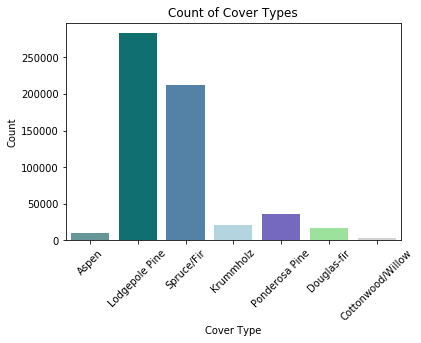

In [96]:
#Review categorical data for classification
print(data.Cover_Type.value_counts())
sns.countplot(x='Cover_Type_2', data=data, palette=palette)
plt.xticks(rotation=45)
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.title('Count of Cover Types')

It appears that there is large variation between the different tree cover types included in the raw dataset.  After reviewing the data a bit further, I'll resample to "even things out" before running my models.

## Feature Exploration

Next I'll look at the distribution of the features using a histogram.

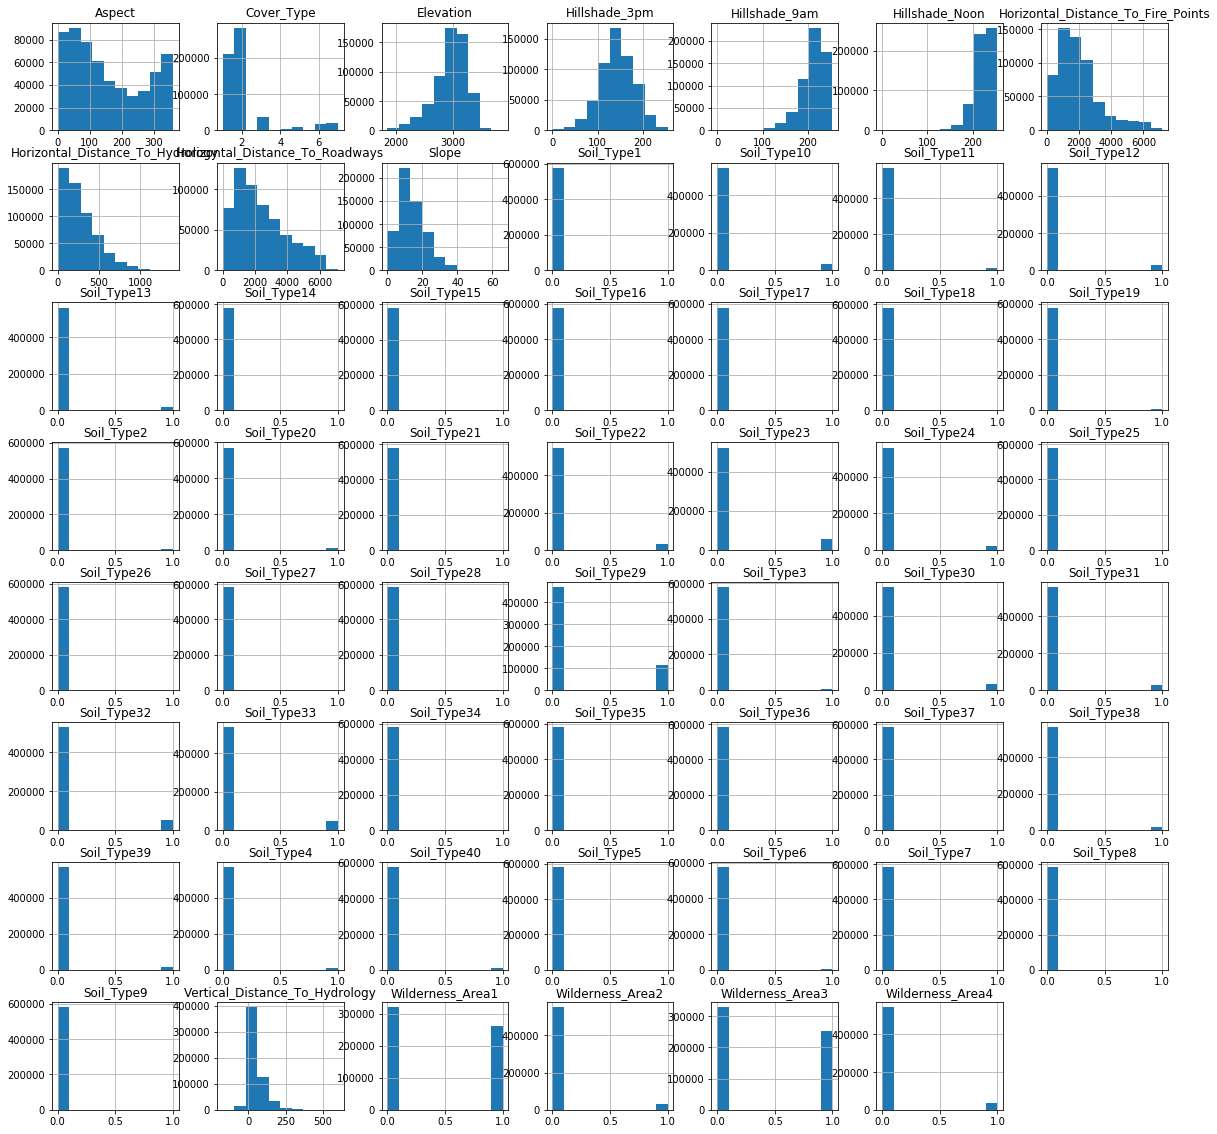

In [97]:
#Look at distribution of all features
data_raw.hist(figsize = (20,20));

- Wilderness areas, soil types and cover_type are categorical data.
- All other features are continuous and either right or left skewed, except for aspect.
- Aspect in degrees azimuth dips in the middle, which makes sense as it's a 360 degree measurement.  Azimuth relates to the direction the Sun is facing: North, South, East, or West. Azimuth of 90 degrees corresponds to East. 
- Hillshade_3pm (0-255 index) is actually closer to normalized when looking at the histogram plot.

### Continuous Feature Exploration

Determine multicollinearity of features for continuous data 

In [98]:
#Create new dataset for continuous features
cont_data = data_raw.loc[:,['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                        'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                        'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
                        'Horizontal_Distance_To_Fire_Points']]
print(len(cont_data))
cont_data.head()

581012


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172


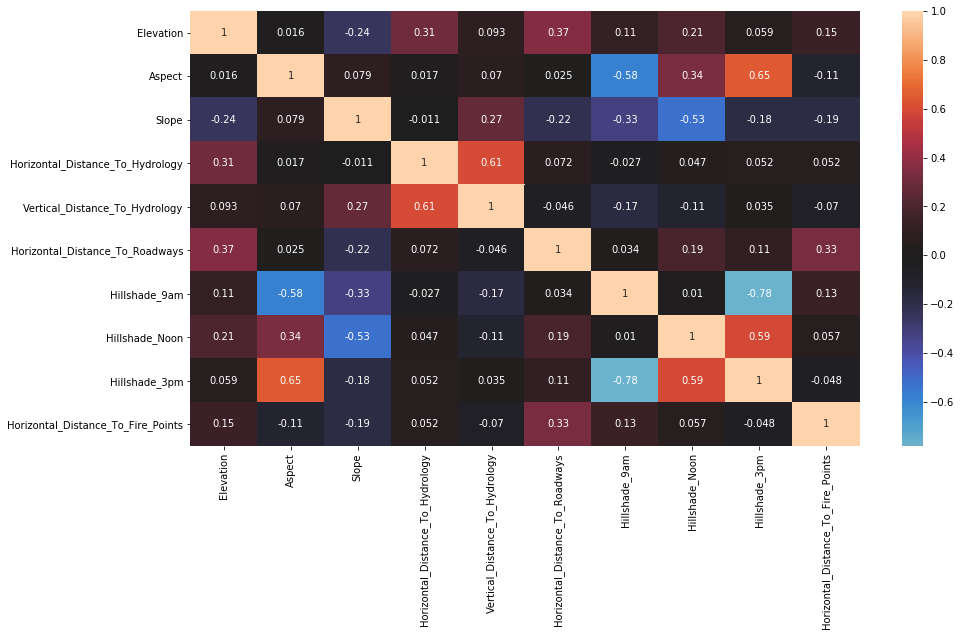

In [99]:
#Create a correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(cont_data.corr(), center=0, annot=True)

Correlated features:
- Aspect and Hillshade_3pm
- Hillshade_Noon and Hillshade_3pm
- Horizontal_Distance_to_Hydrology and Vertical_Distance_to_Hydrology (makes sense)

Look at boxplots for the continuous features to determine which features will be strong predictors for Cover_Type and view their distributions.

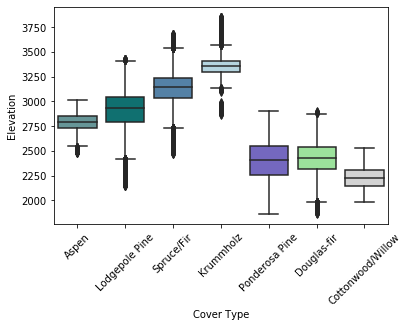

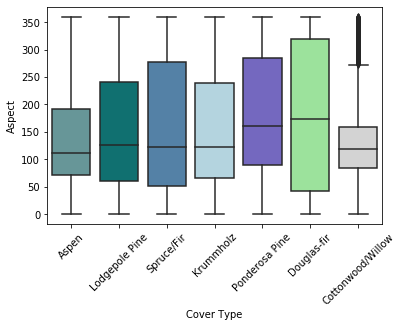

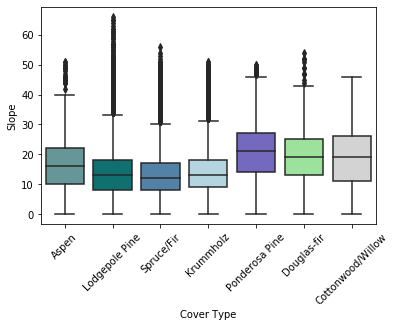

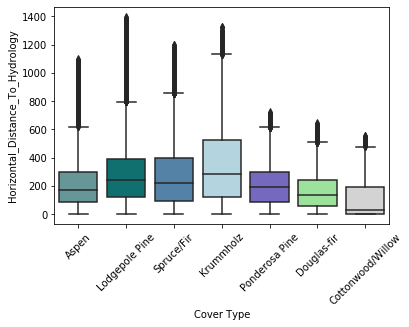

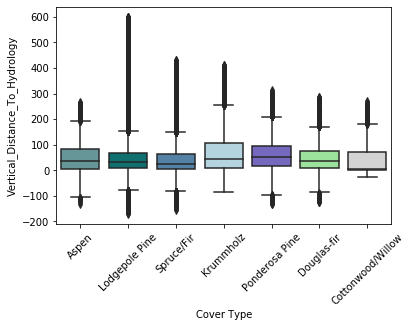

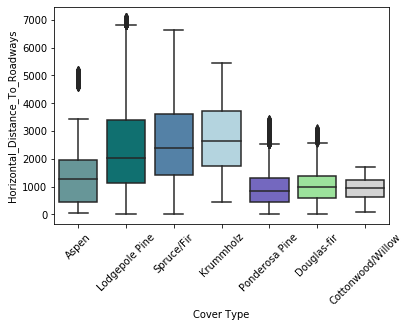

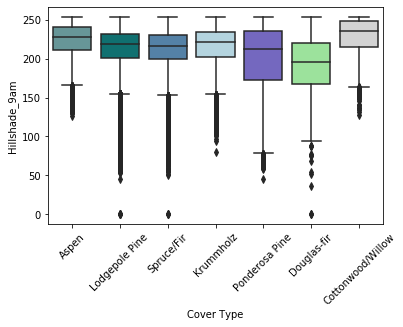

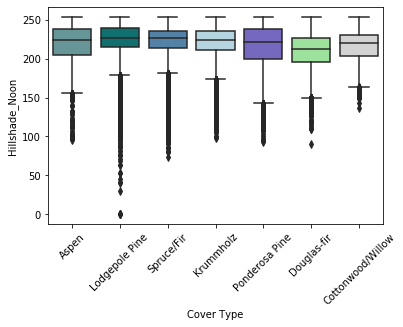

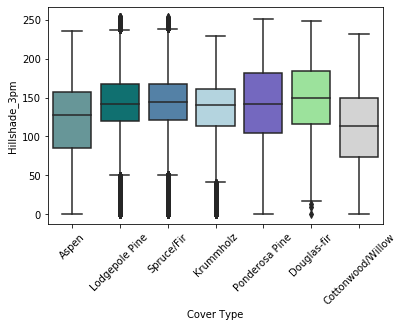

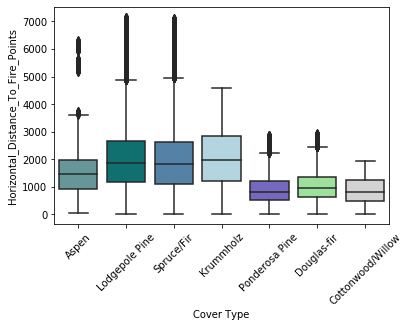

In [100]:
#Create boxplots for continuous features
for feat in cont_data:
    sns.boxplot(x='Cover_Type_2', y=feat, data=data, palette=palette)
    plt.xticks(rotation=45)
    plt.xlabel('Cover Type')
    plt.show()

* Elevation is a very strong predictor of Cover_Type, followed by Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_Points
* Vertical_Distance_To_Hydrology doesn't have much variation based on cover_type compared to Horizontal_Distance_To_Hydrology
* Outliers are present throughout, primarily in Hillshade_Noon, Hillshade_9am, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Hydrology and slope.  

### Categorical Feature Exploration

Look at bar charts to review the categorical features, wilderness area and soil type, and how they are related to Cover_Type

In [101]:
#Review soil type
data_soil = data.loc[:,'Soil_Type1':'Soil_Type40']
data_soil.tail()

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
581007,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581008,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581009,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581010,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581011,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Soil_Type1


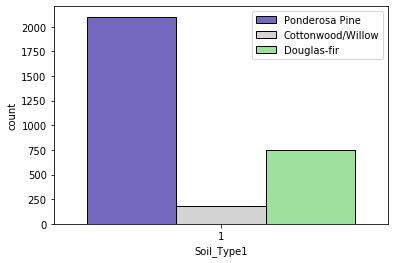

Soil_Type2


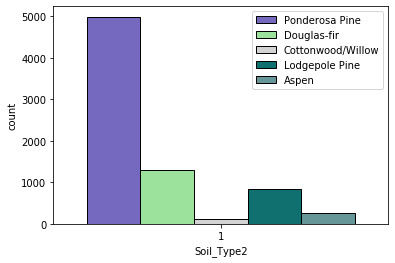

Soil_Type3


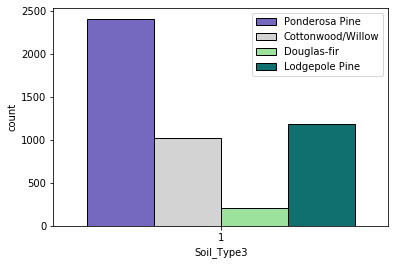

Soil_Type4


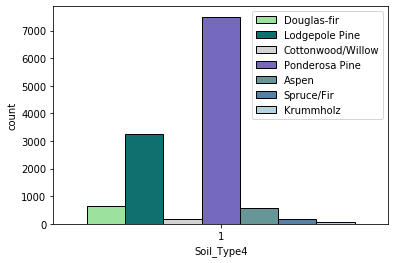

Soil_Type5


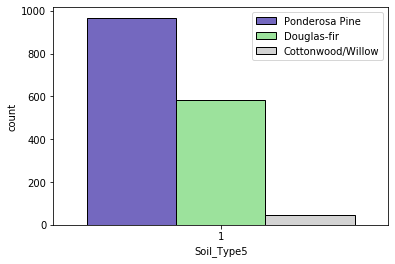

Soil_Type6


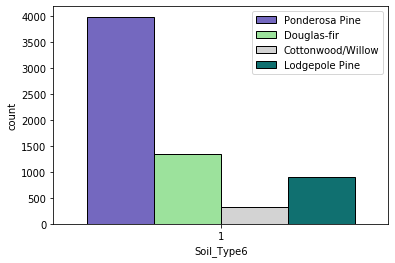

Soil_Type7


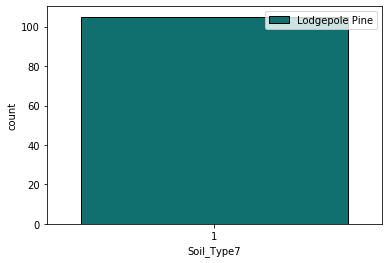

Soil_Type8


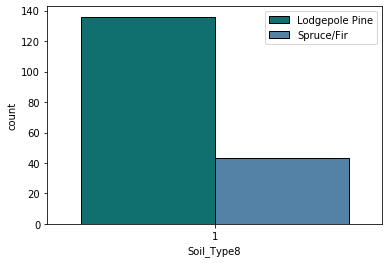

Soil_Type9


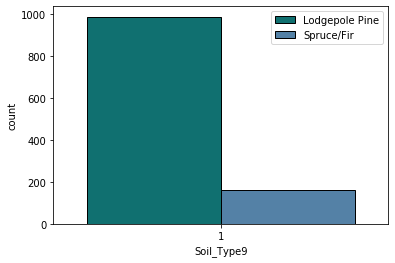

Soil_Type10


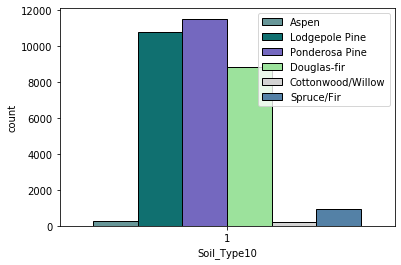

Soil_Type11


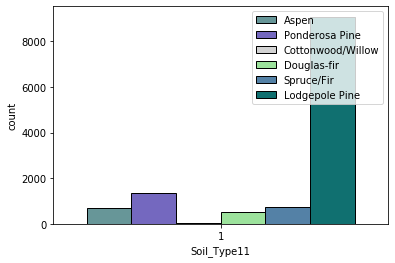

Soil_Type12


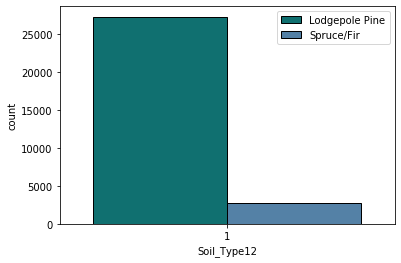

Soil_Type13


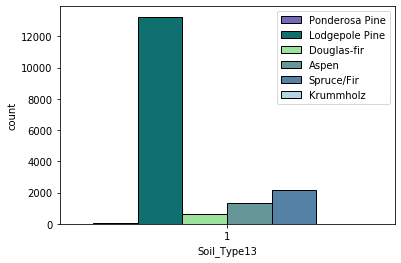

Soil_Type14


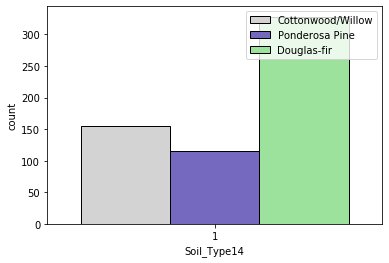

Soil_Type15


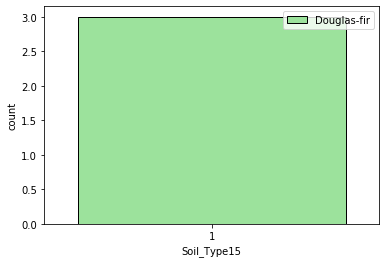

Soil_Type16


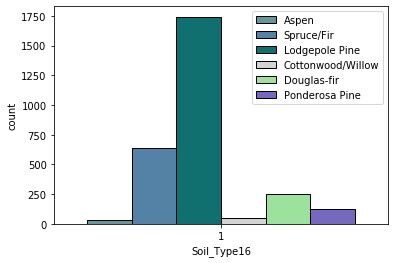

Soil_Type17


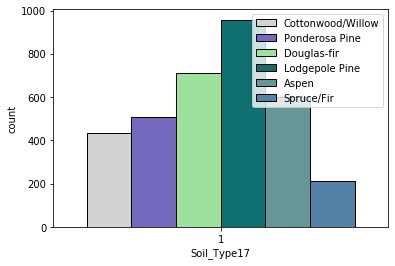

Soil_Type18


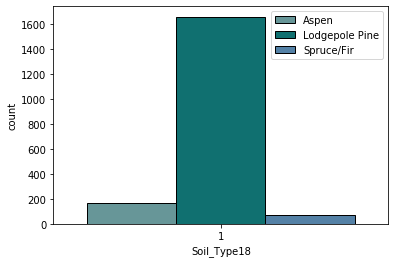

Soil_Type19


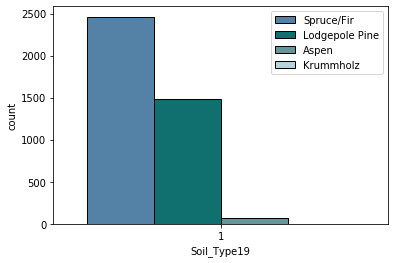

Soil_Type20


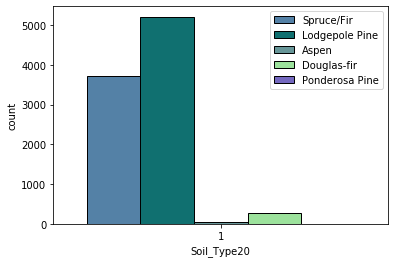

Soil_Type21


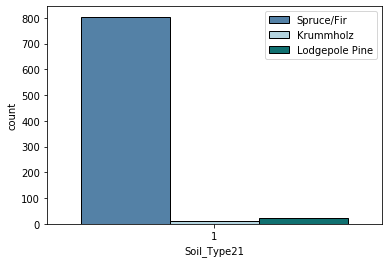

Soil_Type22


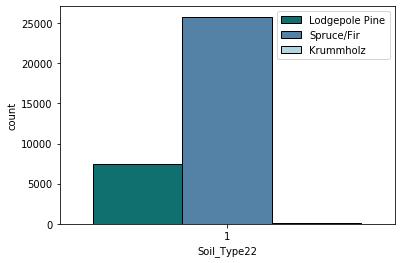

Soil_Type23


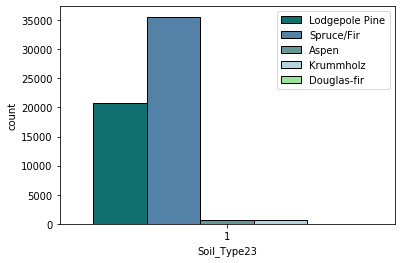

Soil_Type24


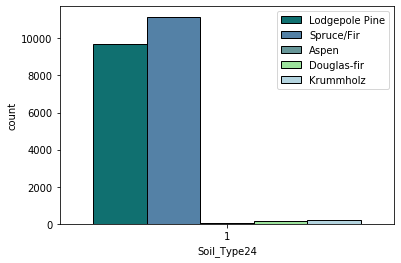

Soil_Type25


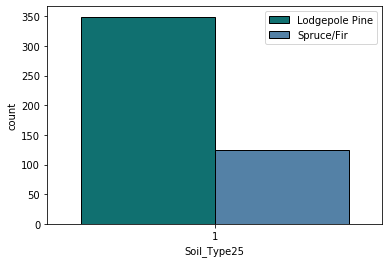

Soil_Type26


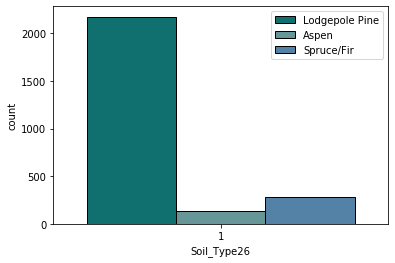

Soil_Type27


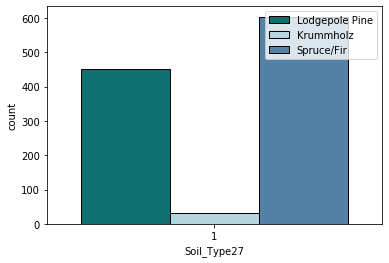

Soil_Type28


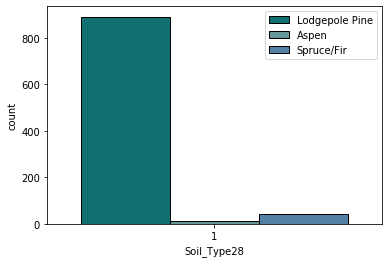

Soil_Type29


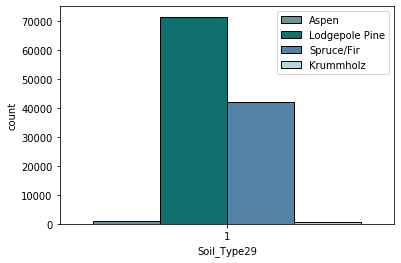

Soil_Type30


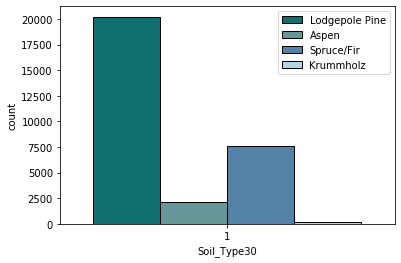

Soil_Type31


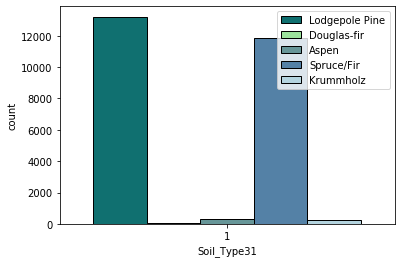

Soil_Type32


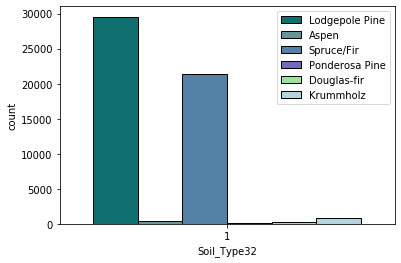

Soil_Type33


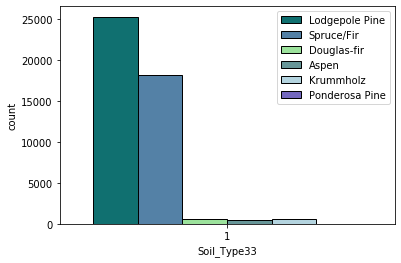

Soil_Type34


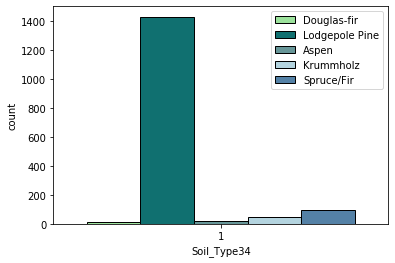

Soil_Type35


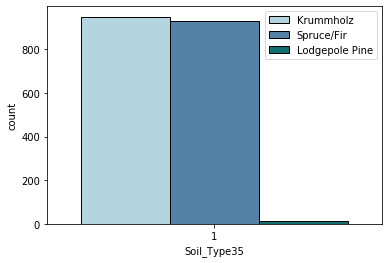

Soil_Type36


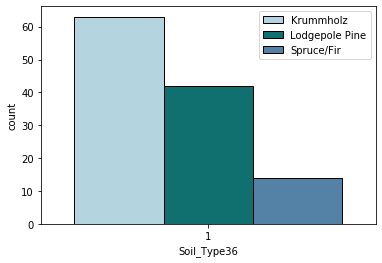

Soil_Type37


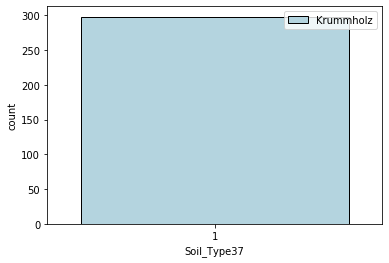

Soil_Type38


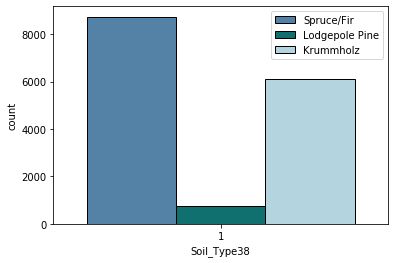

Soil_Type39


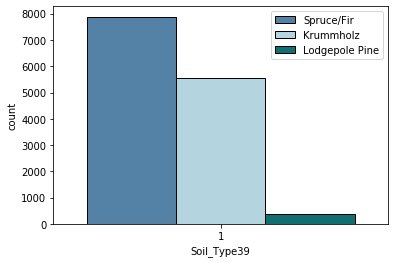

Soil_Type40


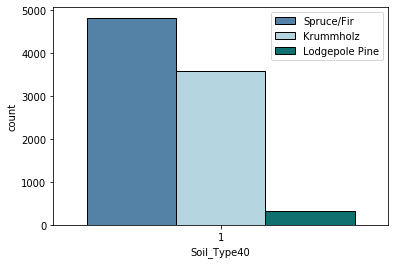

In [102]:
#Create charts to look at soil types
for soil in data_soil.columns:
  if data_soil[soil].sum()>0:
    print(soil)
    sns.countplot(x=soil, hue='Cover_Type_2', data=data.query(soil + '== True'), 
                  palette = palette, linewidth = 1, edgecolor = 'black')
    plt.legend(loc='upper right')
    plt.show()

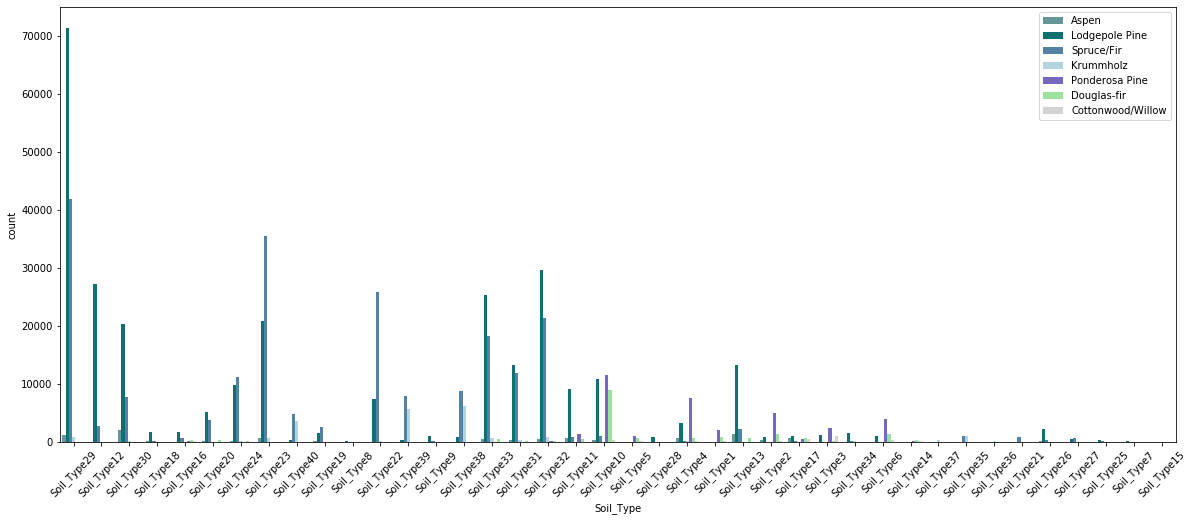

In [103]:
#Combine Soil Types into one graph
def soiltype(item):
    for soil in data_soil.columns:
        if item[soil]==1:
            return soil  

data['Soil_Type']=data_soil.apply(soiltype, axis=1) 
plt.figure(figsize=(20,8))
sns.countplot(x='Soil_Type', hue='Cover_Type_2', data=data, palette=palette)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

Some soil types could be a significant predictor of Cover_Type since they are only present within a single Cover_Type.  There are some soil types that were so small with the raw dataset they may disappear when the data is resampled.  This is alright - since they weren't a large presence to begin with they wouldn't be a strong predictor. 

In [104]:
#Review wilderness area 
data_wild = data.loc[:,'Wilderness_Area1':'Wilderness_Area4']
data_wild.head()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


Wilderness_Area1


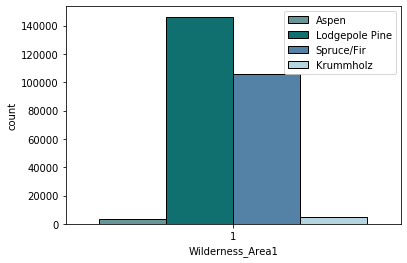

Wilderness_Area2


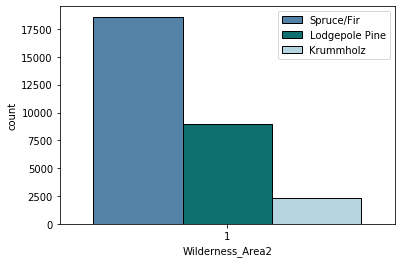

Wilderness_Area3


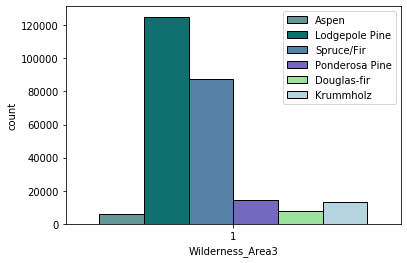

Wilderness_Area4


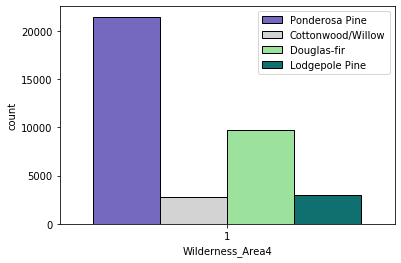

In [105]:
#Create charts to look at wilderness areas 
for wild in data_wild.columns:
    if data_wild[wild].sum()>0:
     print(wild)
     sns.countplot(x=wild, hue='Cover_Type_2', data=data.query(wild + '== True'),
                   palette = palette, linewidth = 1, edgecolor = 'black')
     plt.legend(loc='upper right')
     plt.show()

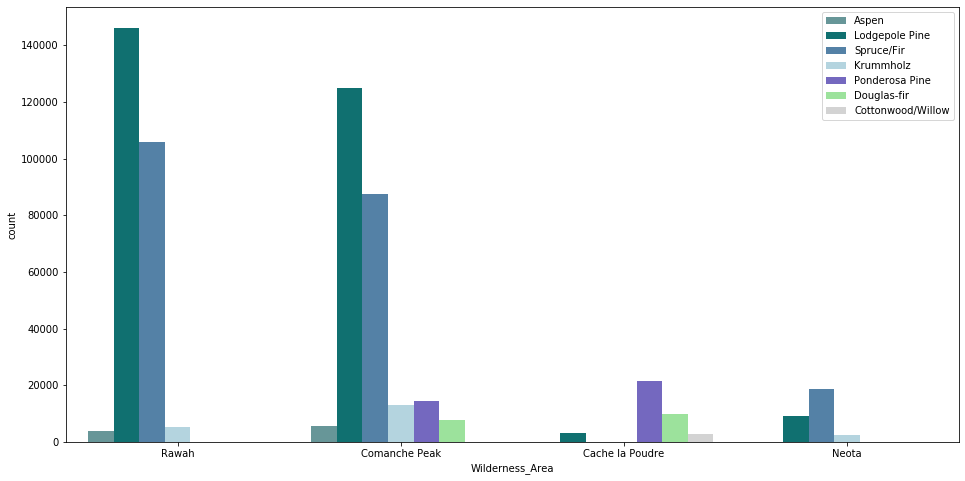

In [106]:
#Combine Wilderness Areas  into one graph
def wildtype(item):
    for wild in data_wild.columns:
        if item[wild]==1:
            return wild  

data['Wilderness_Area']=data_wild.apply(wildtype, axis=1) 
plt.figure(figsize=(16,8))
sns.countplot(x='Wilderness_Area', hue='Cover_Type_2', data=data, palette=palette)
plt.xticks(np.arange(4), ('Rawah','Comanche Peak', 'Cache la Poudre', 'Neota'))
plt.legend(loc='upper right')
plt.show()

Here we can see wilderness area could be a strong predictor of cover type as some areas only have a few trees present, while others have more.  There is also great variation of both number and kind of tree cover type within the different wilderness areas.

In [0]:
#Drop out columns not needed after visualization
data.drop(['Cover_Type_2', 'Soil_Type', 'Wilderness_Area'], axis=1, inplace=True)

# Feature Engineering

## Resample Data

Since there is a large variation between the Cover_Types, the dataset will be resampled using upsampling and downsampling to make them equal for modeling purposes.  The dataset will be resampled from 600K to 50K records for modeling as well to support the upsampling of the smaller category and for ease of modeling.

In [0]:
#Separate different classes
data_ct1 = data[data.Cover_Type == 1]
data_ct2 = data[data.Cover_Type == 2]
data_ct3 = data[data.Cover_Type == 3]
data_ct4 = data[data.Cover_Type == 4]
data_ct5 = data[data.Cover_Type == 5]
data_ct6 = data[data.Cover_Type == 6]
data_ct7 = data[data.Cover_Type == 7]

In [109]:
#Resample data
n = math.ceil(50000 / 7)
data_ct1_downsample = resample(data_ct1, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct2_downsample = resample(data_ct2, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct3_downsample = resample(data_ct3, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct4_upsample = resample(data_ct4, 
                             replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct5_downsample = resample(data_ct5, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct6_downsample = resample(data_ct6, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct7_downsample = resample(data_ct7, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results

data_sampled = pd.concat([data_ct1_downsample, data_ct2_downsample, data_ct3_downsample,
                         data_ct4_upsample, data_ct5_downsample, data_ct6_downsample,
                         data_ct7_downsample])

data_sampled.Cover_Type.value_counts()

7    7143
6    7143
5    7143
4    7143
3    7143
2    7143
1    7143
Name: Cover_Type, dtype: int64

There is now slightly over 7,000 records of each Cover_Type.  I'll check the distribution of the sample data to see how it varies from my raw dataset.

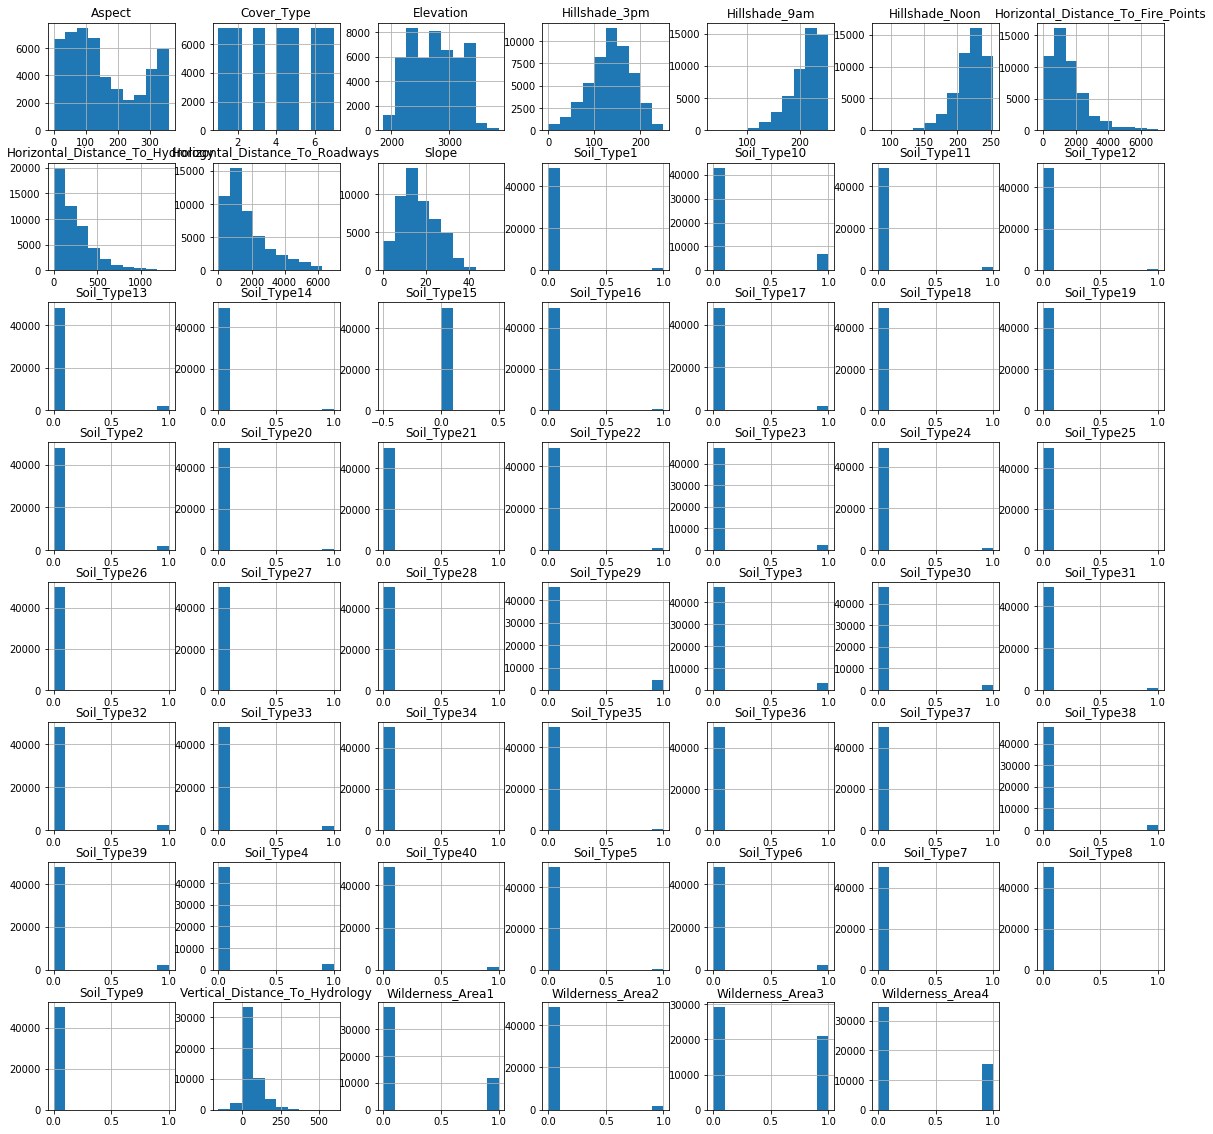

In [110]:
#Look at distribution of sample data
data_sampled.hist(figsize = (20,20));

Comparing distributions the sample population looks similar, except that elevation is a bit more flat than left skewed and some of the Soil Types disappeared.  This was expected because they were initially very small.

Look at the continuous resampled data in more detail for correlated features

In [111]:
#Create dataframe of continuous features
cont_data_sampled = data_sampled.loc[:,['Elevation', 'Aspect', 'Slope', 
                                        'Horizontal_Distance_To_Hydrology',
                                        'Vertical_Distance_To_Hydrology',  
                                        'Horizontal_Distance_To_Roadways','Hillshade_9am', 
                                        'Hillshade_Noon', 'Hillshade_3pm',
                                        'Horizontal_Distance_To_Fire_Points']]
print(len(cont_data_sampled))
cont_data_sampled.head()

50001


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
67445,3254,75,7,365,49,3034,228,228,133,4708
128508,3149,341,16,216,30,3241,186,215,167,3085
75226,2972,321,10,150,13,4796,194,230,176,4607
526081,3097,265,21,430,60,3290,162,244,218,1503
399807,3321,286,7,660,118,797,201,240,179,968


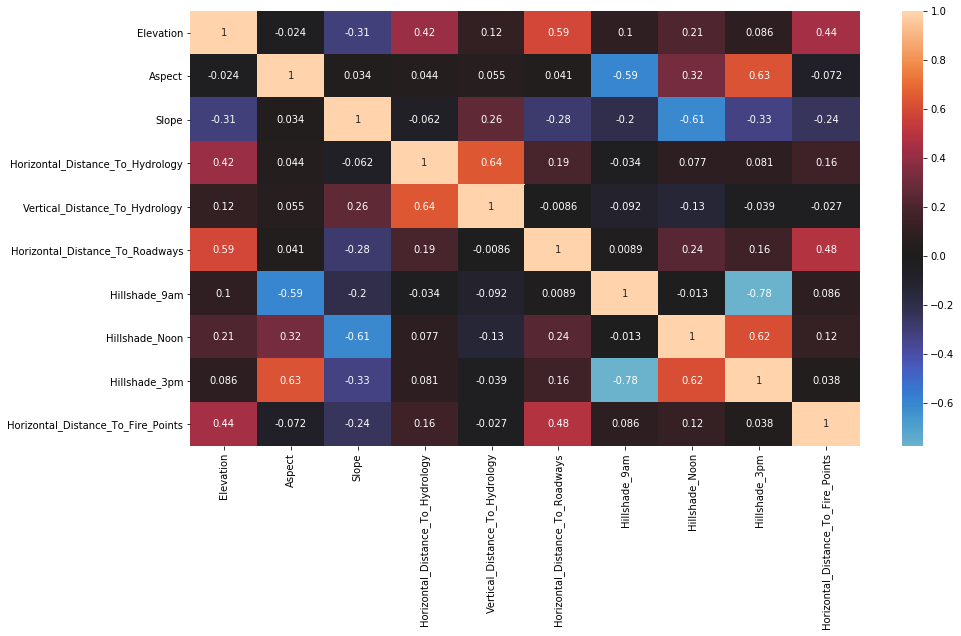

In [112]:
#Recheck correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(cont_data_sampled.corr(), center=0, annot=True)

Correlated Data:
- Hillshade_3pm and Aspect (same as before)
- Hillshade_3pm and Hillshade_Noon (same as before)
- Elevation and Horizontal_Distance_To_Roadways (more correlated now, was at 0.37 before)
- Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology (same as before)
 

I will drop out Hillshade_3pm and Vertical_Distance_To_Hydrology since they are  heavily correlated with Aspect and Hillshade_Noon, and Horizontal_Distance_To_Hydrology, respectively.  This will also help reduce some dimensionality.

In [113]:
#Remove correlated features
cont_data_sampled.drop(['Hillshade_3pm', 'Vertical_Distance_To_Hydrology'], axis=1, inplace=True)
cont_data_sampled.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')

## Standardize Continuous Features

Standardize the data for modeling purposes is needed specifically for distance based models

In [114]:
#Instantiate StandardScaler
scaler = StandardScaler()

#Fit the continuous features in the sample data
scaled = scaler.fit_transform(cont_data_sampled)

#Create a dataframe of the scaled continuous features
scaled_cont_data = pd.DataFrame(scaled, columns=cont_data_sampled.columns, index=cont_data_sampled.index)

#Create a dataframe of the categorical features
data_sampled_cat = data_sampled.loc[:,'Wilderness_Area1':'Soil_Type40']
data_sampled_cat.head()

#Combined both dataframes for modeling
data_sampled2 = pd.concat([scaled_cont_data, data_sampled_cat], axis=1)
data_sampled2.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
67445,1.209444,-0.741239,-1.12753,0.650167,0.988923,0.502929,0.395451,2.903317,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
128508,0.958682,1.677536,-0.06931,-0.060658,1.144323,-0.870691,-0.170242,1.427231,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
75226,0.535970,1.495673,-0.77479,-0.375520,2.311699,-0.609049,0.482481,2.811460,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
526081,0.834496,0.986458,0.51859,0.960259,1.181109,-1.655618,1.091689,-0.011565,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
399807,1.369454,1.177413,-1.12753,2.057506,-0.690447,-0.380113,0.917629,-0.498137,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Train/Validate/Test Split

Create my train/validation/test sets for modeling

In [0]:
#Create feature and target datasets
y = data_sampled['Cover_Type'] #target
X = data_sampled.drop(['Cover_Type', 'Vertical_Distance_To_Hydrology',
                       'Hillshade_3pm'], axis=1) #unscaled features
X_sc = data_sampled2 #scaled features

In [0]:
#Create Train/Validation/Test sets for non scaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [0]:
#Create Train/Validation/Test sets for scaled data
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_sc, y, test_size=0.2, random_state=42)
X_train_sc, X_val_sc, y_train_sc, y_val_sc  = train_test_split(X_train_sc, y_train_sc, test_size=0.2, random_state=42)

## Create Functions For Modeling

Define the functions needed to explore models

In [0]:
#Define a function to get metrics
def get_metrics(y_val, y_pred):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_val, y_pred, pos_label=None, average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_val, y_pred, pos_label=None,average='weighted')
    # harmonic mean of precision and recall
    f1 = f1_score(y_val, y_pred, pos_label=None, average='weighted')
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy, precision, recall, f1

In [0]:
#Define a function to plot Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

In [0]:
#Define a function to create a ROC curve and print the AUC for each Cover_Type 
def roc(y_val, y_score): 
  # Binarize the output
  y_val_bin = label_binarize(y_val, classes=[1, 2, 3, 4, 5, 6, 7])
  n_classes = y_val_bin.shape[1]

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
    plt.plot(fpr[i], tpr[i], color=color[i], lw=2, label="Type" + str(i+1))
    print('AUC for Cover Type {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

  plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic Curves')
  plt.legend()
  plt.show()
  return plt

In [0]:
#Define a function to review feature importance (pipeline)
def plot_feature_importances_pipe(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.named_steps['clf'].feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [0]:
#Define a function to review feature importance (Grid Search)
def plot_feature_importances_gs(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.best_estimator_.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [0]:
#Define a function to find the optimal number of neighbors in KNN
def find_best_k(X_train, y_train, X_val, y_val, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_val)
        accuracy, precision, recall, f1 = get_metrics(y_val, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

# Modeling

## Model #1: Random Forest (Baseline Model with default parameters)

The first model will be a baseline random forest classifier with default parameters and unscaled data.  This is a strong model and generally does pretty well.  
- A random forest algorithm is an ensemble ML model that constructs a multitude of decision trees and outputs the class that is the mode of the classes or mean prediction of the individual trees
- Scaled data is not necessary for a random forest classifier

accuracy = 0.911, precision = 0.910, recall = 0.911, f1 = 0.910


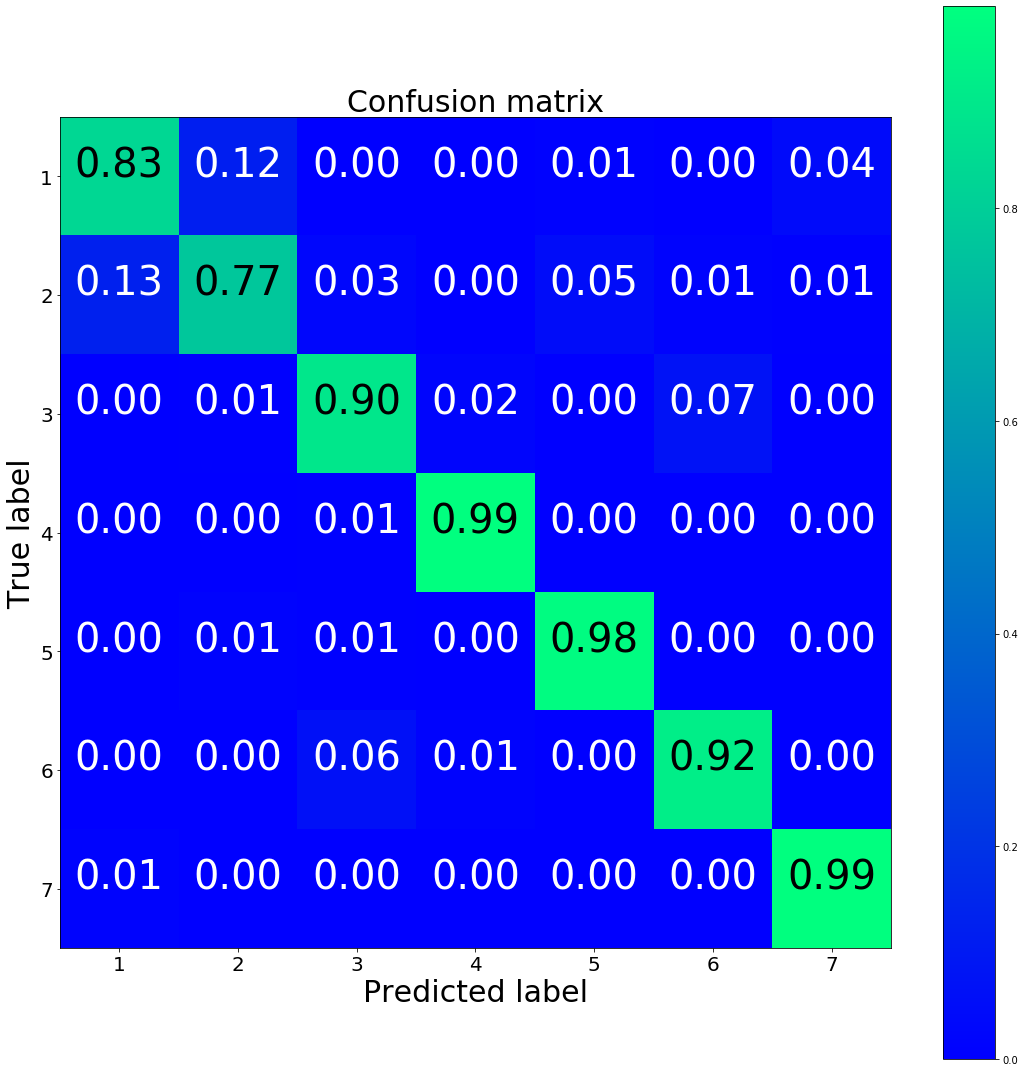

[[ 935  134    0    0   10    1   44]
 [ 148  874   30    0   57   17    8]
 [   0    6 1007   26    4   82    0]
 [   0    0    9 1204    0    3    0]
 [   1   16    6    0 1133    2    0]
 [   0    4   71   14    0 1049    0]
 [  14    1    0    0    0    0 1090]]
AUC for Cover Type 1: 0.9841622519092661
AUC for Cover Type 2: 0.9768894190682713
AUC for Cover Type 3: 0.9939189656565656
AUC for Cover Type 4: 0.9997373124456927
AUC for Cover Type 5: 0.9987149496733323
AUC for Cover Type 6: 0.9958070579473107
AUC for Cover Type 7: 0.9992945245259368


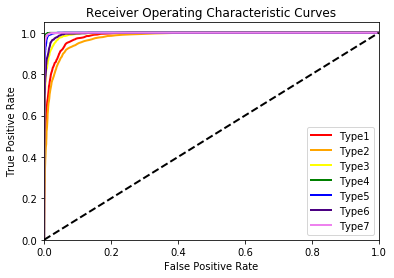

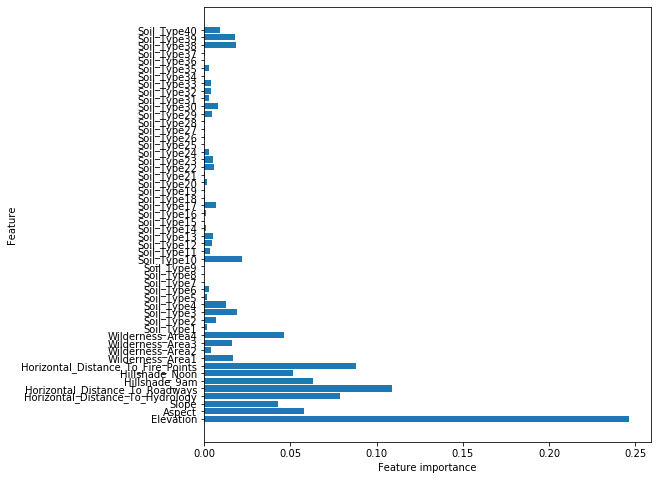

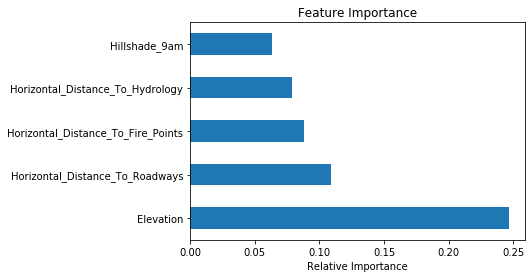

In [124]:
#Construct Pipeline. 
#Random_state=123 to control randomness of bootstrapping of samples used when building trees
pipe_rf_base = Pipeline([('clf', RandomForestClassifier(random_state=123))])
#Fit pipeline
rf_base = pipe_rf_base.fit(X_train, y_train)
#Prediction
y_pred_rf_base = rf_base.predict(X_val)

#View metrics 
accuracy, precision, recall, f1 = get_metrics(y_val, y_pred_rf_base)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

#Plot confusion matrix 
class_names = list(set(y))
cm = confusion_matrix(y_val, y_pred_rf_base)
fig = plt.figure(figsize=(15, 15))
plot = plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion matrix')
plt.show()
print(cm)

#Plot roc curve 
y_score_rf_base = rf_base.predict_proba(X_val)
roc(y_val, y_score_rf_base)

#Plot feature importance 
plot_feature_importances_pipe(rf_base)
plt.show()

#Top 5 most important features
feat_importances = pd.Series(rf_base.named_steps['clf'].feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Feature Importance")
plt.xlabel("Relative Importance")
plt.show()

Results:
* This is a very strong baseline model with 91% accuracy!  
* There are mostly strong true positives in the confusion matrix, however there is larger misclassification for Cover_Type's 1 with 2 and Cover_Type's 6 with 3
* The ROC Curve is showing a very strong model with high AUC for each Cover_Type
* The Feature Importance charts show Elevation is a very important feature for predicting tree cover type in the random forest model, followed by Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_Points.  This is similar to what was seen in the boxplot visualizations above.

## Model #2: KNN

K Nearest Neighbors Model
- Since KNN is a distance-based classifier the data must be scaled  
- I will begin by finding the optimal value of k for the model

In [125]:
#Find the optimal value of K 
find_best_k(X_train_sc, y_train_sc, X_val_sc, y_val_sc)

Best Value for k: 1
F1-Score: 0.8746231077078365


Results:
- Since the optimal value of K = 1, this means that the object is simply assigned to the class of that single nearest neighbor
- I will dive right into a grid search for this model to find the best fit for the data

In [0]:
#Parameters for grid search
param_grid = {
    'n_neighbors': [1],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

Grid Search found the following optimal parameters: 
metric: 'manhattan'
n_neighbors: 1
weights: 'uniform'
accuracy = 0.879, precision = 0.877, recall = 0.879, f1 = 0.878


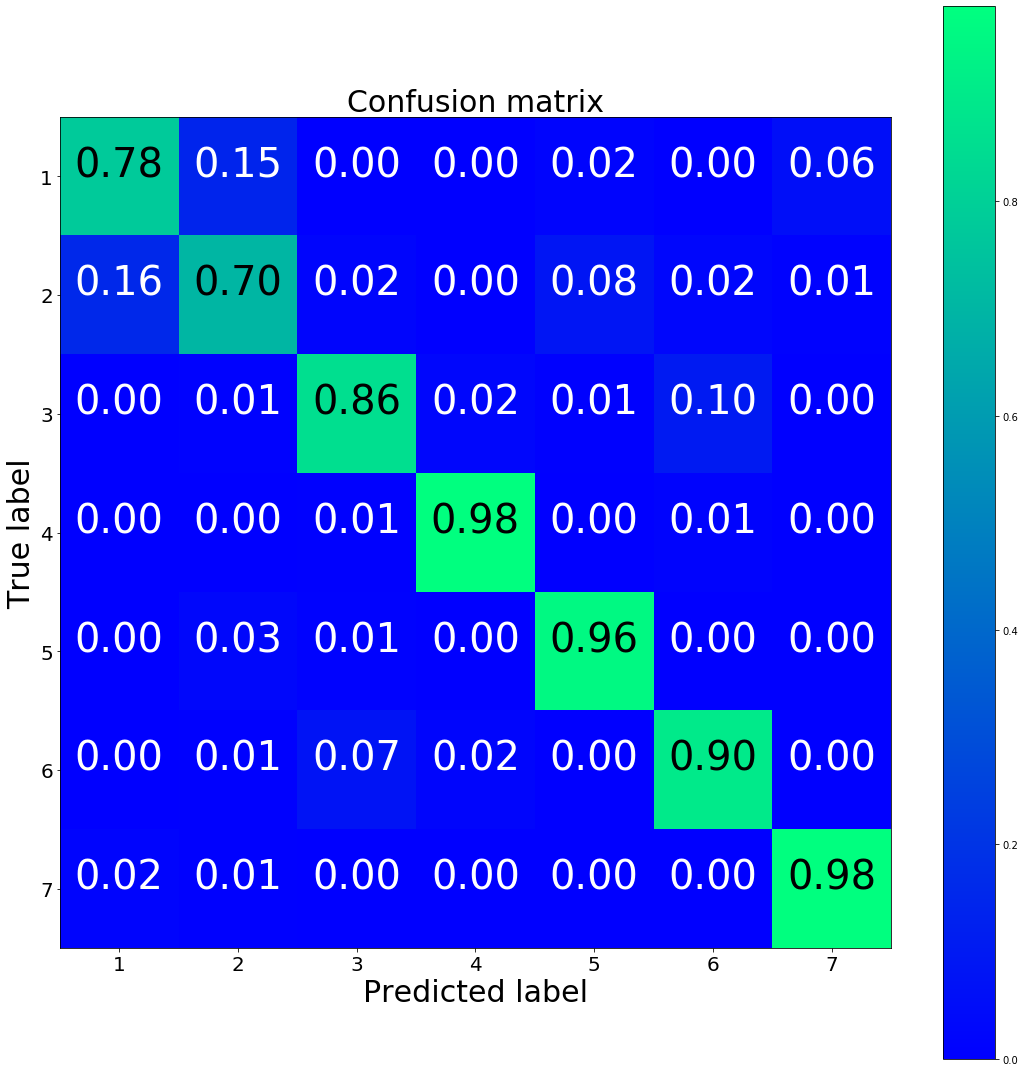

[[ 872  163    1    0   21    4   63]
 [ 181  793   26    1   92   28   13]
 [   1   12  964   28    6  114    0]
 [   0    0    8 1194    0   14    0]
 [   3   32   10    0 1109    4    0]
 [   1    7   84   22    1 1023    0]
 [  17    6    1    0    0    0 1081]]
AUC for Cover Type 1: 0.873138866633957
AUC for Cover Type 2: 0.8336262934039417
AUC for Cover Type 3: 0.918989898989899
AUC for Cover Type 4: 0.9871951030287984
AUC for Cover Type 5: 0.9700734667872266
AUC for Cover Type 6: 0.9375228903838106
AUC for Cover Type 7: 0.9836290314642062


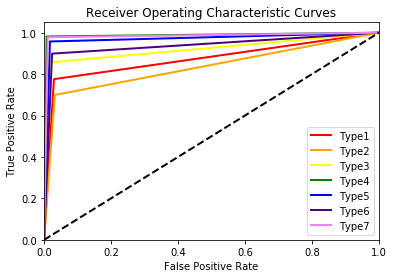

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [127]:
#Perform grid search
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, n_jobs=1)
#Fit grid
grid_knn.fit(X_train_sc, y_train_sc)
#Best parameters
best_parameters = grid_knn.best_params_
print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))
#Prediction
y_pred_knn = grid_knn.predict(X_val_sc)

#View metrics for KNN classifier
accuracy, precision, recall, f1 = get_metrics(y_val_sc, y_pred_knn)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

#Plot confusion matrix for KNN model
class_names = list(set(y))
cm = confusion_matrix(y_val_sc, y_pred_knn)
fig = plt.figure(figsize=(15, 15))
plot = plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion matrix')
plt.show()
print(cm)

# Compute ROC curve and ROC area for each tree type class
y_score_knn = grid_knn.predict_proba(X_val_sc)
roc(y_val_sc, y_score_knn)

Results: 
- The KNN Classifier gives a final F1-Score of 87%, this is lower than the baseline Random Forest model
- Again, there are mostly strong true positives in the confusion matrix, however there is larger misclassification for Cover_Type's 1 with 2 and Cover_Type's 6 with 3
- The AUC for each Cover_Type is less here as well
- Feature importance is not defined for the KNN classifier

## Model #3: XGBoost

XGBoost is a boosting ensemble method 
- Known to be a stronger model than Adaboost and Gradient Boosting
- Boost up the decision trees weak learners
- Similar to a random forest model, scaled data is not needed here 

In [128]:
#Construct pipeline, without scaler and with default parameters
pipe_xgb = Pipeline([('clf', XGBClassifier())])
#Fit pipeline
model_xgb = pipe_xgb.fit(X_train, y_train)
#Prediction
y_pred_xgb = model_xgb.predict(X_val)

#View metrics for XGBoost classifier
accuracy, precision, recall, f1 = get_metrics(y_val, y_pred_xgb)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

accuracy = 0.757, precision = 0.755, recall = 0.757, f1 = 0.749


Results:
- Using a XGBoost classifier with default parameters provided the lowest accuracy so far at 75%
- Grid Search will be performed on the model to see if results can be improved 

In [0]:
#Parameters for grid search
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100, 500],
}

Grid Search found the following optimal parameters using cv=3, n_jobs=1: 
* learning_rate: 0.2
* max_depth: 6
* min_child_weight: 1
* n_estimators: 500
* subsample: 0.7
* accuracy = 0.918, precision = 0.917, recall = 0.918, f1 = 0.917



accuracy = 0.918, precision = 0.917, recall = 0.918, f1 = 0.917


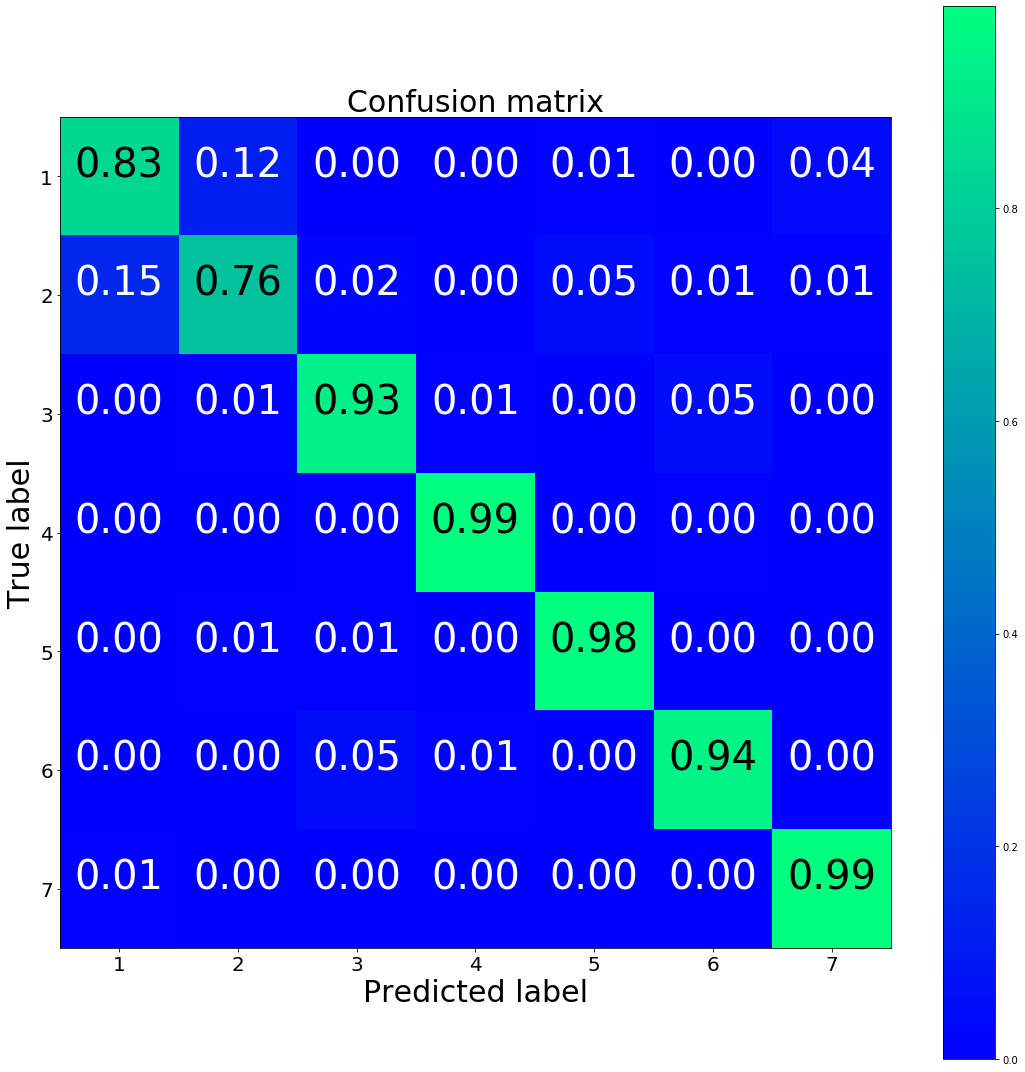

[[ 937  133    0    0   11    0   43]
 [ 173  860   25    0   55   13    8]
 [   0   11 1044   12    3   55    0]
 [   0    0    6 1204    0    6    0]
 [   1   12    6    0 1139    0    0]
 [   0    2   54   11    1 1070    0]
 [  12    1    0    0    0    0 1092]]
AUC for Cover Type 1: 0.9857441635147473
AUC for Cover Type 2: 0.9786266299034528
AUC for Cover Type 3: 0.9958654707070707
AUC for Cover Type 4: 0.9997333121276069
AUC for Cover Type 5: 0.9987013816420877
AUC for Cover Type 6: 0.9971573664904758
AUC for Cover Type 7: 0.9993630376789528


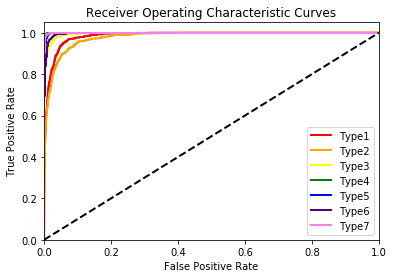

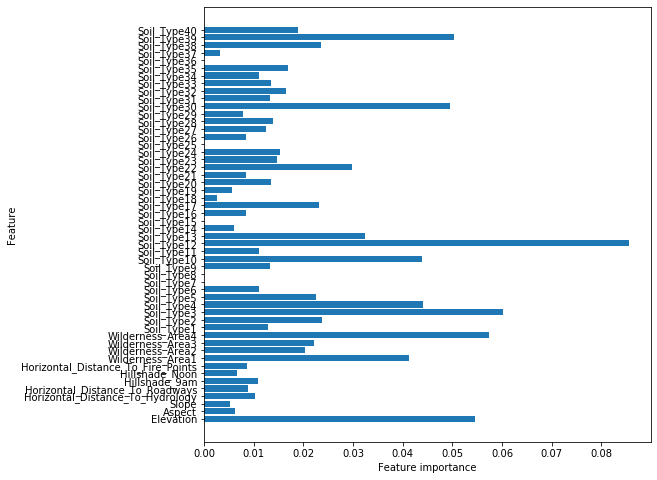

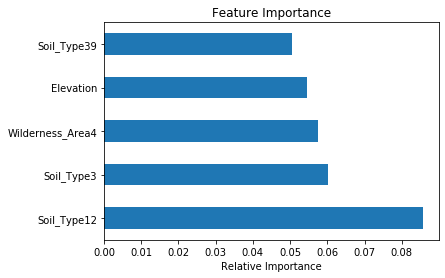

In [131]:
#Construct pipeline
pipe_xgb2 = Pipeline([('clf', XGBClassifier(learning_rate=0.2, max_depth=6, 
                                            min_child_weight = 1, n_estimators =500, 
                                            subsample=0.7))])
#Fit pipeline
pipe_xgb2.fit(X_train, y_train)
#Prediction
y_pred_xgb2 = pipe_xgb2.predict(X_val)

#View metrics for XGBoost classifier
accuracy, precision, recall, f1 = get_metrics(y_val, y_pred_xgb2)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

#Plot confusion matrix for XGBoost model
class_names = list(set(y))
cm = confusion_matrix(y_val, y_pred_xgb2)
fig = plt.figure(figsize=(15, 15))
plot = plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion matrix')
plt.show()
print(cm)

# Compute ROC curve and ROC area for each tree type class
y_score_xgb = pipe_xgb2.predict_proba(X_val)
roc(y_val, y_score_xgb)

#Plot feature importance 
plot_feature_importances_pipe(pipe_xgb2)
plt.show()

#Plot top 5 most important features
feat_importances = pd.Series(pipe_xgb2.named_steps['clf'].feature_importances_, 
                             index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Feature Importance")
plt.xlabel("Relative Importance")
plt.show()

Results:
- The metrics for XGBoost is larger than the baseline Random Forest classifier, and the KNN classifier at around 92% F1-Score
- There are mostly strong true positives in the confusion matrix, however there is larger misclassification for Cover_Type's 1 with 2, Cover_Type's 2 with 5 (but not 5 with 2) and Cover_Type's 6 with 3
- The ROC Curve is showing a very strong model with high AUC for each Cover_Type
* The Feature Importance charts show Elevation is still an important feature for predicting tree cover type, but certain soil types have also become important features in this model, which was seen during exploration.

I could keep tuning the parameters to get higher accuracy in the models above, but since the baseline random forest model performed so well I will revisit and try to improve the model using gird search.

## Final Model: Random Forest 

Perfecting the Random Forest Classifier:
- Perform a grid search to see if result can be improved from the default random forest model

In [0]:
#Parameters for grid search
param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [1, 2],
              'min_samples_split': [2, 4],
              'max_depth': [30, 50],
              'n_estimators': [100, 500, 1000]
}

Grid Search found the following optimal parameters: 
criterion: 'gini'
max_depth: 50
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 500
accuracy = 0.912, precision = 0.911, recall = 0.912, f1 = 0.911


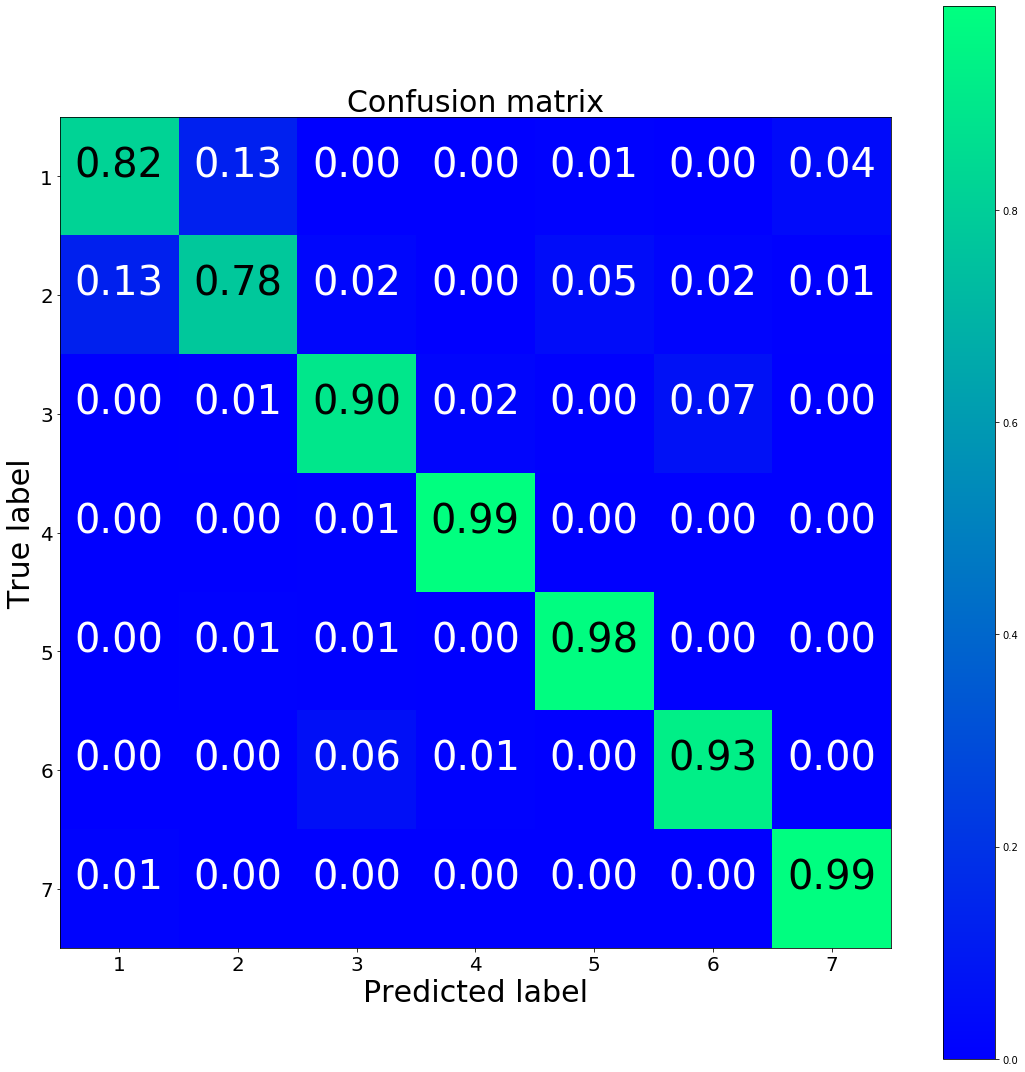

[[ 924  143    0    0    9    1   47]
 [ 145  879   28    0   56   18    8]
 [   0    6 1010   26    5   78    0]
 [   0    0    7 1206    0    3    0]
 [   1   12    6    0 1137    2    0]
 [   0    4   69   11    0 1054    0]
 [  13    2    0    0    0    0 1090]]
AUC for Cover Type 1: 0.9846875071164026
AUC for Cover Type 2: 0.9780447554624659
AUC for Cover Type 3: 0.9942633373737375
AUC for Cover Type 4: 0.9997352516757696
AUC for Cover Type 5: 0.99878354711502
AUC for Cover Type 6: 0.9960793734783498
AUC for Cover Type 7: 0.999333309270604


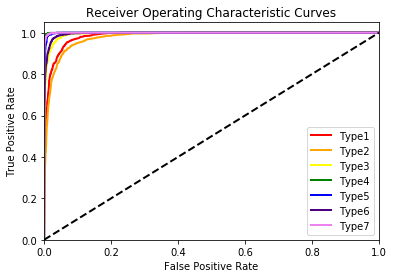

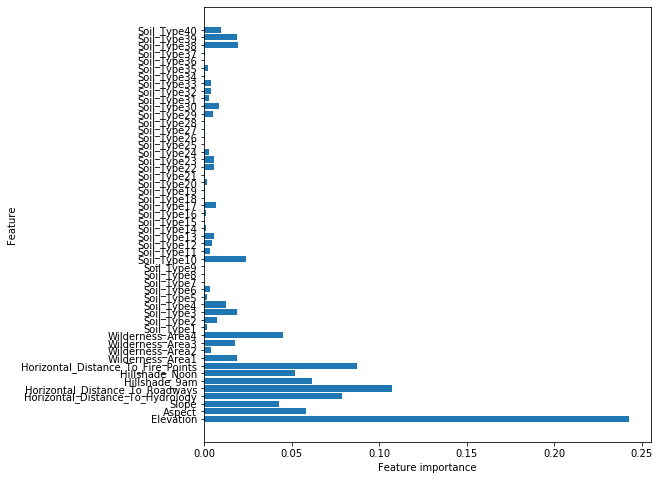

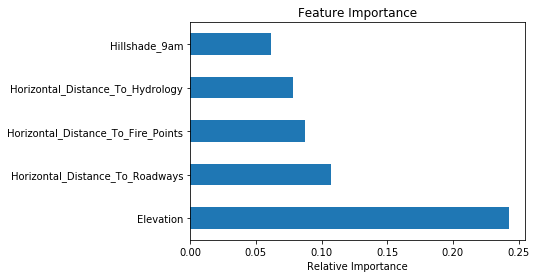

In [133]:
#Construct grid search 
grid_rf = GridSearchCV(RandomForestClassifier(random_state=123), param_grid, cv=3, n_jobs=1)
#Fit grid 
grid_rf.fit(X_train, y_train)
#Best parameters
best_parameters = grid_rf.best_params_
print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))
#Prediction
y_pred_rf2 = grid_rf.predict(X_val)

#View metrics 
accuracy, precision, recall, f1 = get_metrics(y_val, y_pred_rf2)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

#Plot confusion matrix for Random Forest model
class_names = list(set(y))
cm = confusion_matrix(y_val, y_pred_rf2)
fig = plt.figure(figsize=(15, 15))
plot = plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion matrix')
plt.show()
print(cm)

# Compute ROC curve and ROC area for each tree type class
y_score_rf = grid_rf.predict_proba(X_val)
roc(y_val, y_score_rf)

#Plot feature importance 
plot_feature_importances_gs(grid_rf)
plt.show()

#Top 5 most important features
feat_importances = pd.Series(grid_rf.best_estimator_.feature_importances_, 
                             index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Feature Importance")
plt.xlabel("Relative Importance")
plt.show()

Results: 
* The Feature Importance for Random Forest mostly involves Elevation, where there is more of a mix for XGBoost (the boosting model) with some of the soil times being important features to predict Cover_Tree.  


Grid Search found the following optimal parameters: 
* criterion: 'gini'
* max_depth: 50
* min_samples_leaf: 1
* min_samples_split: 2
* n_estimators: 500
* accuracy = 0.912, precision = 0.911, recall = 0.912, f1 = 0.911

# Final Model on Test Data

accuracy = 0.915, precision = 0.913, recall = 0.915, f1 = 0.914


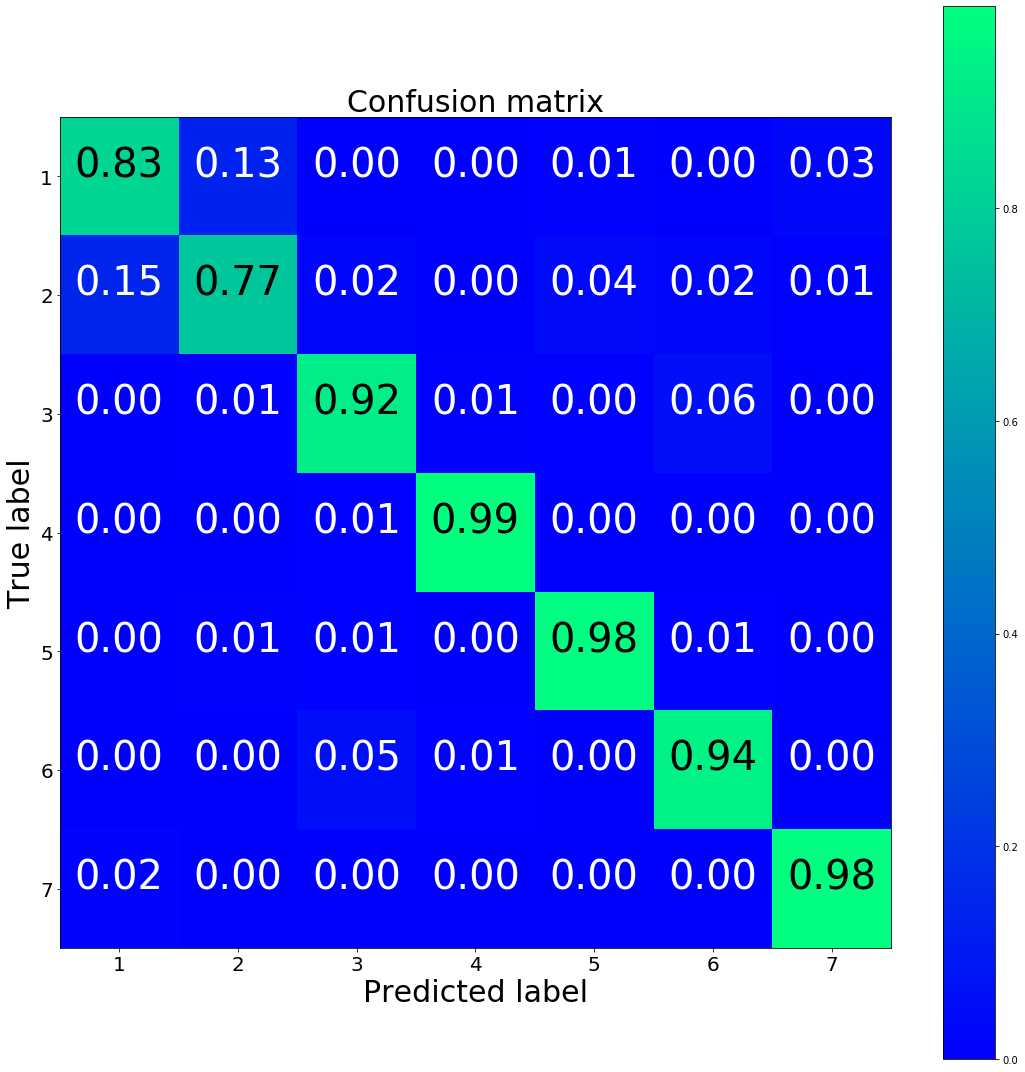

[[1213  195    0    0   16    0   44]
 [ 203 1076   30    0   52   30    7]
 [   0    9 1362   17    7   89    0]
 [   0    0   10 1379    0    4    0]
 [   0   12   10    0 1438   11    0]
 [   1    3   73    7    0 1296    0]
 [  24    1    0    0    0    0 1382]]
AUC for Cover Type 1: 0.9840051973249551
AUC for Cover Type 2: 0.9760164509934901
AUC for Cover Type 3: 0.9947194559667727
AUC for Cover Type 4: 0.9996391443409293
AUC for Cover Type 5: 0.9989867409223893
AUC for Cover Type 6: 0.9960088190448332
AUC for Cover Type 7: 0.999215415988312


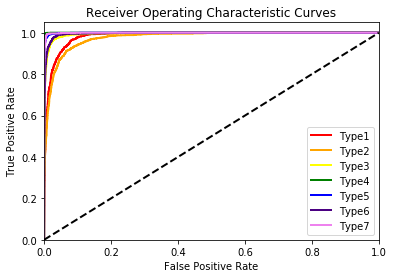

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [135]:
#Prediction
y_pred_xgb3 = pipe_xgb2.predict(X_test)

#View metrics 
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_xgb3)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

#Plot confusion matrix 
class_names = list(set(y))
cm = confusion_matrix(y_test, y_pred_xgb3)
fig = plt.figure(figsize=(15, 15))
plot = plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion matrix')
plt.show()
print(cm)

#Plot roc curve 
y_score_xgb3= pipe_xgb2.predict_proba(X_test)
roc(y_test, y_score_xgb3)

# Conclusion

In Conclusion, The XGBoost model performs the best on the data, followed by the Random Forest Model.  It is interesting that both models have similar misclassification when looking at the confusion matrices, but the important features used to classify the Cover_Type is different.  The XGBoost model primarily uses Soil_Type features, while the Random Forest model uses Elevation.  In the end, we see 91.5% accuracy with the XGBoost model on the test data.  

Future work could include additional grid searches on the model to increase accuracy.